In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [7]:
# Data Loading from a CSV FILE
df=pd.read_csv("car data.csv")
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [9]:
# DATA COLLECTION FROM A EXCEL FILE
df=pd.read_excel("carsnew.xlsx")
print(df.head())

   Make      Model  Variant Ex-Showroom_Price Displacement  Cylinders  \
0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc        2.0   
1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc        2.0   
2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc        2.0   
3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc        2.0   
4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RWD (Rear Wheel Drive)                In-line   
1                  2.0  RWD (Rear Wheel Drive)                In-line   
2                  2.0  RWD (Rear Wheel Drive)                In-line   
3                  2.0  RWD (Rear Wheel Drive)                In-line   
4                  2.0  RWD (Rear Wheel Drive)                In-line   

  Emission_Norm  ... Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
0         BS IV  ...                     

In [11]:
!pip install pandas requests beautifulsoup4 selenium webdriver-manager numpy matplotlib opencv-python librosa openpyxl

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.7 MB 2.9 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.7 MB 3.5 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.7 MB 3.8 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.7 MB 4.2 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.7 MB 4.4 MB/s eta 0:00:02
   --------------------------- ------------ 6.6/9.7 MB 4.6 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.7 MB 4.7 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.7 MB 4.9 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.7 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   - --------------------

In [18]:
# SQL DATABASE
import sqlite3
import pandas as pd
import os # Import os for cleanup

database_name = 'practice_db.db'
table_name = 'sensor_readings'

# --- Database Setup (Creates and populates a mock database) ---

# Optional: Remove the existing DB file to ensure a clean start and avoid
# primary key violation errors on re-run, which can also cause unexpected locking.
if os.path.exists(database_name):
    os.remove(database_name)
    print(f"Removed existing database file: {database_name}")

# Use 'with sqlite3.connect(...) as conn:'
# This context manager automatically closes the connection, releasing the lock.
try:
    with sqlite3.connect(database_name) as conn:
        cursor = conn.cursor()

        # Create table
        cursor.execute(f"""
        CREATE TABLE IF NOT EXISTS {table_name} (
            id INTEGER PRIMARY KEY,
            timestamp TEXT,
            temperature REAL,
            device_id TEXT
        );
        """)

        # Insert mock data
        # NOTE: Using the data provided in the code block, not the traceback.
        mock_data = [
            (1, '2025-01-01 10:00:00', 22.5, 'DevA'),
            (2, '2025-01-01 10:05:00', 25.1, 'DevB'),
            (3, '2025-01-01 10:10:00', 23.9, 'DevA')
        ]
        
        # Insert data
        cursor.executemany(f"INSERT INTO {table_name} (id, timestamp, temperature, device_id) VALUES (?, ?, ?, ?)", mock_data)
        
        # conn.commit() is still necessary for the 'with' statement to save changes
        conn.commit() 
        print(f"Mock SQLite database '{database_name}' created and populated.")
        
# The connection is automatically closed when the 'with' block exits.

# -------------------------------------------------------------

## 🔍 Collecting Data from SQL (Using a new, separate connection for the read operation)
# This is a safer approach for read operations, especially with pandas.

    query = f"SELECT * FROM {table_name} WHERE device_id = 'DevA'"

    # Open a new connection for the read operation
    with sqlite3.connect(database_name) as conn_read:
        sql_data = pd.read_sql_query(query, conn_read)
        print("\n✅ SQL Database Data Collected (Filtered by DevA):")
        print(sql_data)

except Exception as e:
    print(f"\n❌ Error encountered: {e}")

Mock SQLite database 'practice_db.db' created and populated.

✅ SQL Database Data Collected (Filtered by DevA):
   id            timestamp  temperature device_id
0   1  2025-01-01 10:00:00         22.5      DevA
1   3  2025-01-01 10:10:00         23.9      DevA


In [19]:
# REST API
import requests
import pandas as pd

# Public API endpoint returning a list of posts
api_url = 'https://jsonplaceholder.typicode.com/posts?_limit=5'

print(f"Attempting to fetch data from: {api_url}")

try:
    # Send a GET request
    response = requests.get(api_url, timeout=10)
    
    # Raise an exception for bad status codes (4xx or 5xx)
    response.raise_for_status() 
    
    # Parse the JSON response data (it will be a list of dictionaries)
    json_data = response.json()
    
    # Convert the list of dictionaries into a pandas DataFrame
    api_data = pd.DataFrame(json_data)
    
    print("\n✅ REST API Data Collected:")
    print(api_data[['id', 'title']].head())
    
except requests.exceptions.RequestException as e:
    print(f"\n❌ Error fetching API data: {e}")

Attempting to fetch data from: https://jsonplaceholder.typicode.com/posts?_limit=5

✅ REST API Data Collected:
   id                                              title
0   1  sunt aut facere repellat provident occaecati e...
1   2                                       qui est esse
2   3  ea molestias quasi exercitationem repellat qui...
3   4                               eum et est occaecati
4   5                                 nesciunt quas odio


In [20]:
# WEB SCRAPPING FROMA A STATIC WEBSITE
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'http://quotes.toscrape.com/'
print(f"Attempting to scrape static site: {url}")

try:
    # Fetch the content
    page = requests.get(url, timeout=10)
    page.raise_for_status()
    
    # Parse the HTML
    soup = BeautifulSoup(page.content, 'html.parser')
    
    scraped_quotes = []
    
    # Find all quote elements (divs with class 'quote')
    for quote_div in soup.find_all('div', class_='quote'):
        text = quote_div.find('span', class_='text').get_text(strip=True)
        author = quote_div.find('small', class_='author').get_text(strip=True)
        
        scraped_quotes.append({
            'text': text,
            'author': author
        })
        
    scrape_data = pd.DataFrame(scraped_quotes)
    
    print("\n✅ Static Web Scraping Data Collected (Quotes):")
    print(scrape_data.head(2))
    
except requests.exceptions.RequestException as e:
    print(f"\n❌ Error scraping static site: {e}")

Attempting to scrape static site: http://quotes.toscrape.com/

✅ Static Web Scraping Data Collected (Quotes):
                                                text           author
0  “The world as we have created it is a process ...  Albert Einstein
1  “It is our choices, Harry, that show what we t...     J.K. Rowling


In [21]:
# WEB SCRAPPING FROM A DYNAMIC WEBSITE
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep

# A simple dynamic test site (results are loaded via JS)
dynamic_url = 'https://www.scrapingbee.com/web-scraping-tool/' 

print(f"Attempting to scrape dynamic site using Selenium: {dynamic_url}")

try:
    # 1. Setup options (run browser invisibly)
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    
    # 2. Start WebDriver (ChromeDriverManager automatically downloads the correct driver)
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)
    
    driver.get(dynamic_url)
    
    # 3. Wait for the JavaScript content to load (critical for dynamic scraping)
    # This element is usually loaded via JS
    sleep(5) # Wait 5 seconds for the content to fully render
    
    # 4. Find a known element that is dynamically loaded
    # Targeting the div that contains the "Web Scraping Tool" header text
    dynamic_element = driver.find_element(By.TAG_NAME, 'h1') 
    
    print("\n✅ Dynamic Web Scraping Data Collected (Element Text):")
    print(dynamic_element.text)
    
except Exception as e:
    print(f"\n❌ Error with Dynamic Web Scraping (Selenium): {e}")
    print("   Ensure you have installed: pip install selenium webdriver-manager")
finally:
    if 'driver' in locals() or 'driver' in globals():
        driver.quit() # Always close the browser

Attempting to scrape dynamic site using Selenium: https://www.scrapingbee.com/web-scraping-tool/

✅ Dynamic Web Scraping Data Collected (Element Text):
Oops! Page Not Found


In [23]:
# Streaming Data from KAFKA
!pip install confluent-kafka
from confluent_kafka import Consumer, KafkaException, KafkaError
import sys

# Configuration - CHANGE THIS TO YOUR KAFKA HOST
KAFKA_HOST = 'localhost:9092' 
TOPIC_NAME = 'test_topic' 

conf = {
    'bootstrap.servers': KAFKA_HOST,
    'group.id': 'jupyter_consumer_group',
    'auto.offset.reset': 'earliest'
}

print(f"Attempting to connect to Kafka at {KAFKA_HOST}...")

# Initialize Kafka Consumer
consumer = Consumer(conf)
try:
    consumer.subscribe([TOPIC_NAME])
    
    messages = []
    timeout = 5  # Stop after 5 seconds of attempts
    
    print(f"Listening for messages on topic '{TOPIC_NAME}' for {timeout} seconds...")

    # Poll for messages
    while True:
        msg = consumer.poll(timeout=1.0) # Wait up to 1 second for a message
        if msg is None:
            timeout -= 1
            if timeout <= 0:
                break
            continue

        if msg.error():
            if msg.error().code() == KafkaError._PARTITION_EOF:
                # End of partition event - not an error
                continue
            else:
                raise KafkaException(msg.error())

        # Success: Decode and collect the message value
        value = msg.value().decode('utf-8')
        messages.append(value)
        print(f" --> Collected: {value}")
        
    print("\n✅ Streaming Data Collected:")
    print(f"Total messages collected: {len(messages)}")
    if messages:
        print("First Message:", messages[0])

except Exception as e:
    print(f"\n❌ Error with Kafka Consumer: {e}")
    print("   Ensure the Kafka broker is running at the specified host.")
finally:
    consumer.close()

   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/4.1 MB 3.5 MB/s eta 0:00:02
   ---------- ----------------------------- 1.0/4.1 MB 3.7 MB/s eta 0:00:01
   ----------------- ---------------------- 1.8/4.1 MB 3.2 MB/s eta 0:00:01
   --------------------------- ------------ 2.9/4.1 MB 3.7 MB/s eta 0:00:01
   ----------------------------------- ---- 3.7/4.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 4.1/4.1 MB 3.6 MB/s eta 0:00:00
Attempting to connect to Kafka at localhost:9092...
Listening for messages on topic 'test_topic' for 5 seconds...

✅ Streaming Data Collected:
Total messages collected: 0


In [24]:
# IOT AND SENSOR DATA
import pandas as pd
import random
from datetime import datetime, timedelta

num_readings = 100
start_time = datetime.now()

# Generate mock data points
timestamps = [start_time - timedelta(minutes=i) for i in range(num_readings)]
temperature = [round(random.uniform(20.0, 30.0), 2) for _ in range(num_readings)]
pressure = [round(random.uniform(95.0, 105.0), 2) for _ in range(num_readings)]
device_status = random.choices(['ON', 'OFF', 'STANDBY'], weights=[0.8, 0.1, 0.1], k=num_readings)

# Create DataFrame
sensor_data = pd.DataFrame({
    'timestamp': timestamps,
    'temperature_c': temperature,
    'barometric_pressure': pressure,
    'device_status': device_status
})

# Ensure timestamp is the index for time-series analysis
sensor_data.set_index('timestamp', inplace=True)
sensor_data.sort_index(inplace=True)

print("✅ IoT/Sensor Data Collected (Simulated):")
print(sensor_data.tail())

✅ IoT/Sensor Data Collected (Simulated):
                            temperature_c  barometric_pressure device_status
timestamp                                                                   
2025-12-03 21:49:04.666559          28.13                98.44            ON
2025-12-03 21:50:04.666559          22.07               102.58            ON
2025-12-03 21:51:04.666559          22.25                99.30            ON
2025-12-03 21:52:04.666559          29.95               104.59            ON
2025-12-03 21:53:04.666559          20.29                98.54            ON



✅ Image Data Collected: Shape=(2021, 3000, 3), Data Type=uint8


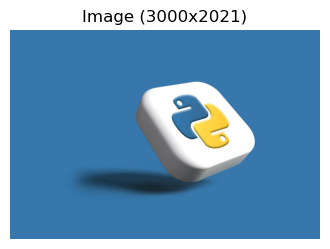

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# --- Mock Data Setup (Create a simple black image if test_image.jpg is missing) ---
image_file = 'image.jpg'
try:
    # Attempt to load a real image
    img = cv2.imread(image_file)
    if img is None:
        raise FileNotFoundError
except FileNotFoundError:
    # Create a simple 100x100 black image with a white dot
    img = np.zeros((100, 100, 3), dtype=np.uint8) # Black image
    img[50:52, 50:52] = [255, 255, 255] # White dot (BGR format)
    cv2.imwrite(image_file, img)
    print("Mock image 'test_image.jpg' created for demonstration.")
# -----------------------------------------------------------------------------------

## 🖼️ Collecting Image Data
try:
    img = cv2.imread(image_file)
    
    if img is not None:
        print(f"\n✅ Image Data Collected: Shape={img.shape}, Data Type={img.dtype}")
        
        # OpenCV reads in BGR format; Matplotlib expects RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(4, 4))
        plt.imshow(img_rgb)
        plt.title(f"Image ({img.shape[1]}x{img.shape[0]})")
        plt.axis('off')
        plt.show() 
        
        
    else:
        print(f"\n❌ Error: Could not read '{image_file}'.")
        
except Exception as e:
    print(f"\n❌ Error with OpenCV/Matplotlib: {e}")

In [26]:
# DATA COLLECTING FROM A TEXT FILE
import librosa
import numpy as np
import os

# --- Mock Data Setup (Create mock files) ---
text_file = 'sample_text.txt'
with open(text_file, 'w', encoding='utf-8') as f:
    f.write("This is a sample text file containing some raw data and unstructured text.\nLine two for log file processing.")
print(f"Mock text file '{text_file}' created.")
## 📝 Collecting Text Data (Raw)
try:
    with open(text_file, 'r', encoding='utf-8') as f:
        text_data = f.read()
    
    print("\n✅ Text Data Collected:")
    print(text_data.split('\n')[0] + "...")
    
except FileNotFoundError:
    print(f"\n❌ Error: '{text_file}' not found.")

Mock text file 'sample_text.txt' created.

✅ Text Data Collected:
This is a sample text file containing some raw data and unstructured text....


In [28]:
# COLLECTING AUDIO DATA
import librosa
import numpy as np
import os
# audio_file = 'sample_audio.wav' # No longer needed for file loading

# --- Synthetic Audio Source ---
# Define the sampling rate and duration for our mock audio
sr = 22050
duration = 2.0 # 2 seconds of audio
frequency = 440.0 # A standard tone (A4)

# Generate a time array
t = np.linspace(0., duration, int(sr * duration), endpoint=False)

# Generate a simple sine wave (the waveform data)
waveform = 0.5 * np.sin(2. * np.pi * frequency * t).astype(np.float32)
# ------------------------------

## 🎤 Collecting Audio Data (Waveform)
try:
    # Instead of loading, we use the generated 'waveform' and 'sr' variables
    
    print("\n✅ Audio Data Collected (Synthetic Sine Wave):")
    print(f"Waveform (NumPy array) Shape: {waveform.shape}")
    print(f"Sampling Rate (sr): {sr} Hz")
    print(f"Duration: {waveform.shape[0] / sr:.2f} seconds")
    
    # --- Example Analysis using Librosa (Demonstrates librosa is working) ---
    
    # Calculate the Mel-Frequency Cepstral Coefficients (MFCCs)
    # MFCCs are a standard feature in speech recognition 
    mfccs = librosa.feature.mfcc(y=waveform, sr=sr, n_mfcc=13)
    
    print("\n🔍 Audio Feature Analysis (MFCCs):")
    print(f"MFCCs Shape: {mfccs.shape} (13 features x time frames)")
    # --------------------------------------------------------------------------
    
except Exception as e:
    print(f"\n❌ Error during audio processing: {e}")


✅ Audio Data Collected (Synthetic Sine Wave):
Waveform (NumPy array) Shape: (44100,)
Sampling Rate (sr): 22050 Hz
Duration: 2.00 seconds

🔍 Audio Feature Analysis (MFCCs):
MFCCs Shape: (13, 87) (13 features x time frames)


In [31]:
# CLOUD STORAGE
!pip install boto3
import boto3
import os

# --- AWS Configuration (REPLACE THESE) ---
# CRITICAL: Replace 'your-unique-s3-bucket-name' with a valid S3 bucket name you own.
bucket_name = 'your-unique-s3-bucket-name'  # <-- MUST BE REPLACED
# CRITICAL: Ensure 'raw_data/config.json' is a valid file (key) in your S3 bucket.
key_name = 'raw_data/config.json' 
local_file_name = 'downloaded_config.json'
# -----------------------------------------

# The code assumes you have configured your AWS credentials
# via environment variables or AWS CLI (best practice).
# If you must use code, uncomment and replace the lines below:
# s3 = boto3.client('s3', aws_access_key_id='YOUR_ACCESS_KEY', aws_secret_access_key='YOUR_SECRET_KEY')

print(f"Attempting to download '{key_name}' from S3 bucket '{bucket_name}'...")

try:
    # Initialize the S3 client (assumes credentials are set in environment/config)
    s3 = boto3.client('s3')
    
    # Download the file from S3 to the local environment 
    s3.download_file(bucket_name, key_name, local_file_name)
    
    print(f"\n✅ Cloud Storage Data Collected: Successfully downloaded to '{local_file_name}'.")
    print(f"Local file size: {os.path.getsize(local_file_name)} bytes")
    
except s3.exceptions.NoSuchKey:
    # Use the specific exception for a missing key for better error handling
    print(f"\n❌ Error: File '{key_name}' not found in S3 bucket '{bucket_name}'.")
except FileNotFoundError:
    # Handles issues if the local directory path doesn't exist (less common)
    print(f"\n❌ Error: Local path error or issue accessing local file system.")
except Exception as e:
    print(f"\n❌ Error connecting to or downloading from S3: {e}")
    print("    Ensure your bucket name, key name, and AWS credentials are correct.")

Attempting to download 'raw_data/config.json' from S3 bucket 'your-unique-s3-bucket-name'...

❌ Error connecting to or downloading from S3: Unable to locate credentials
    Ensure your bucket name, key name, and AWS credentials are correct.


In [32]:
# Raw Files,log Files,JSON DATA
import json
import os

# --- Mock Data Setup ---
log_file = 'server.log'
json_file = 'config.json'

with open(log_file, 'w') as f:
    f.write("[2025-01-01 10:00:01] INFO: Server started successfully.\n")
    f.write("[2025-01-01 10:00:05] WARN: Low memory detected.\n")
    f.write("[2025-01-01 10:00:10] ERROR: DB connection failed.\n")
    
with open(json_file, 'w') as f:
    json.dump({"version": "1.2", "settings": {"timeout": 30, "logging_level": "DEBUG"}}, f)
    
print("Mock log and JSON files created.")
# -----------------------

## 📜 Collecting Raw/Log Files (Line-by-line)
log_lines = []
try:
    with open(log_file, 'r') as f:
        # Read file line by line for efficient handling of large files
        for line in f:
            log_lines.append(line.strip())
            
    print("\n✅ Log File Data Collected (First 3 lines):")
    for line in log_lines:
        print(f"| {line}")

except FileNotFoundError:
    print(f"\n❌ Error: '{log_file}' not found.")

## 🧩 Collecting JSON Data (Structured)
try:
    with open(json_file, 'r') as f:
        # json.load() parses the file content directly into a Python dictionary/list
        json_data = json.load(f)
        
    print("\n✅ JSON Data Collected:")
    print(f"Loaded Type: {type(json_data)}")
    print(f"Version: {json_data['version']}")
    print(f"Timeout Setting: {json_data['settings']['timeout']}")
    
except FileNotFoundError:
    print(f"\n❌ Error: '{json_file}' not found.")
except Exception as e:
    print(f"\n❌ Error parsing JSON: {e}")

Mock log and JSON files created.

✅ Log File Data Collected (First 3 lines):
| [2025-01-01 10:00:01] INFO: Server started successfully.
| [2025-01-01 10:00:05] WARN: Low memory detected.
| [2025-01-01 10:00:10] ERROR: DB connection failed.

✅ JSON Data Collected:
Loaded Type: <class 'dict'>
Version: 1.2
Timeout Setting: 30
